# KC Roasters

## Context

Coffee roasting is the process of turning green coffee beans into brown ones. Brown coffee beans can be made in a variety of methods, which also influences the flavor of the end product. A roasting instrument is basically a convection oven. It is a mechanism of inflicting heat energy into the raw product which makes the product consumable.
And the price of coffee is heavily influenced by the quality of the beans after roasting. As a result, the cost can be determined depending on the quality of the beans after roasting.

The rising automation in the manufacturing business necessitates the automation of quality inspection of output products with minimal human intervention. Quality inspectors in businesses examine product quality after it is manufactured to ensure that it meets industry standards. 

Each product's quality inspection is a time-consuming manual process, and a low-quality product wastes upstream factory capacity, consumables, labor, and money. With the emerging AI trend, companies are looking to leverage machine learning-based technologies to automate material quality inspection during the manufacturing process to reduce human intervention while achieving human-level or better accuracy.



## Objective

A roasting corporation named "KC Roasters" has engaged you to predict the quality of a roasting instrument's outputs, which will be used to determine the price of coffee beans.
The quality value ranges from 0 to 100 with 0 being the worst and 100 being the best.
and the higher the quality of the beans, the higher the price.

The coffee roasting instrument used by Roasters is divided into five equal-sized compartments, each with three temperature sensors. 3 sensors have been installed at 3 different locations to be able to capture temperature at different locations inside the chamber.
Additionally, the height of raw material (volume entering the chamber) and relative humidity of roasted material is provided

The data shared consists of 17 predictor variables and a continuous target variable, and the aim is to build a Regression model which can accurately predict the quality of the product. After finding out the quality, the company can decide the cost of beans effectively.


## Data Dictionary
- T_data_1_1 - Temperature recorded by 1st sensor in the 1st chamber in Fahrenheit
- T_data_1_2 - Temperature recorded by 2nd sensor in the 1st chamber in Fahrenheit
- T_data_1_3 - Temperature recorded by 3rd sensor in the 1st chamber in Fahrenheit
- T_data_2_1 - Temperature recorded by 1st sensor in the 2nd chamber in Fahrenheit
- T_data_2_2 - Temperature recorded by 2nd sensor in the 2nd chamber in Fahrenheit
- T_data_2_3 - Temperature recorded by 3rd sensor in the 2nd chamber in Fahrenheit
- T_data_3_1 - Temperature recorded by 1st sensor in the 3rd chamber in Fahrenheit
- T_data_3_2 - Temperature recorded by 2nd sensor in the 3rd chamber in Fahrenheit
- T_data_3_3 - Temperature recorded by 3rd sensor in the 3rd chamber in Fahrenheit
- T_data_4_1 - Temperature recorded by 1st sensor in the 4th chamber in Fahrenheit
- T_data_4_2 - Temperature recorded by 2nd sensor in the 4th chamber in Fahrenheit
- T_data_4_3 - Temperature recorded by 3rd sensor in the 4th chamber in Fahrenheit
- T_data_5_1 - Temperature recorded by 1st sensor in the 5th chamber in Fahrenheit
- T_data_5_2 - Temperature recorded by 2nd sensor in the 5th chamber in Fahrenheit
- T_data_5_3 - Temperature recorded by 3rd sensor in the 5th chamber in Fahrenheit
- H_data - Height of Raw material layer, basically represents the volume of raw material going inside the chamber in pounds.
- AH_data - Roasted Coffee beans relative humidity.


## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

## Loading Data

In [2]:
df = pd.read_csv('coffee.csv')
df.head()

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
0,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22,61
1,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22,57
2,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22,61
3,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22,63
4,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22,63


## Data Overview

In [3]:
df.describe()

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
count,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29087.000000,29100.000000,29131.000000
mean,253.552058,254.078061,254.057636,343.075796,344.523669,342.017335,494.513371,495.851155,500.774776,345.080979,342.737633,345.233772,245.813910,246.304143,245.757235,171.127323,7.551075,64.321753
std,32.487764,30.024924,28.977460,32.543595,33.718698,31.030835,50.315054,43.755845,64.995545,43.405324,38.339966,35.051519,25.498535,26.520344,26.050775,14.078937,1.123104,16.396936
min,13.000000,168.000000,183.000000,70.000000,113.000000,107.000000,311.000000,401.000000,197.000000,53.000000,51.000000,52.000000,114.000000,145.000000,146.000000,144.410000,4.380000,0.000000
25%,232.000000,231.000000,232.000000,325.000000,326.000000,322.500000,461.000000,460.000000,460.000000,324.000000,322.000000,326.000000,226.000000,226.000000,225.000000,157.350000,6.810000,54.000000
50%,252.000000,254.000000,252.000000,344.000000,344.000000,343.000000,497.000000,498.000000,499.000000,343.000000,343.000000,344.000000,245.000000,245.000000,247.000000,170.470000,7.520000,66.000000
75%,280.000000,280.000000,279.000000,363.000000,364.000000,363.000000,524.000000,527.000000,530.000000,362.000000,362.000000,361.000000,267.000000,266.000000,266.000000,182.135000,8.320000,77.000000
max,343.000000,341.000000,339.000000,436.000000,598.000000,433.000000,1024.000000,756.000000,934.000000,912.000000,613.000000,695.000000,319.000000,361.000000,374.000000,203.680000,10.740000,100.000000


All the statistical analysis of the data is shown above, we can see
- Count of the each feature 
- Mean, Std, minimum, and maximum of all the features
-  the quartile range of each feature is given above

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29131 entries, 0 to 29130
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T_data_1_1  29131 non-null  int64  
 1   T_data_1_2  29131 non-null  int64  
 2   T_data_1_3  29131 non-null  int64  
 3   T_data_2_1  29131 non-null  int64  
 4   T_data_2_2  29131 non-null  int64  
 5   T_data_2_3  29131 non-null  int64  
 6   T_data_3_1  29131 non-null  int64  
 7   T_data_3_2  29131 non-null  int64  
 8   T_data_3_3  29131 non-null  int64  
 9   T_data_4_1  29131 non-null  int64  
 10  T_data_4_2  29131 non-null  int64  
 11  T_data_4_3  29131 non-null  int64  
 12  T_data_5_1  29131 non-null  int64  
 13  T_data_5_2  29131 non-null  int64  
 14  T_data_5_3  29131 non-null  int64  
 15  H_data      29087 non-null  float64
 16  AH_data     29100 non-null  float64
 17  quality     29131 non-null  int64  
dtypes: float64(2), int64(16)
memory usage: 4.0 MB


The over all information of the dataset is shown above

## EDA

### Univariate analysis

In [5]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting histograms and boxplots for all the variables

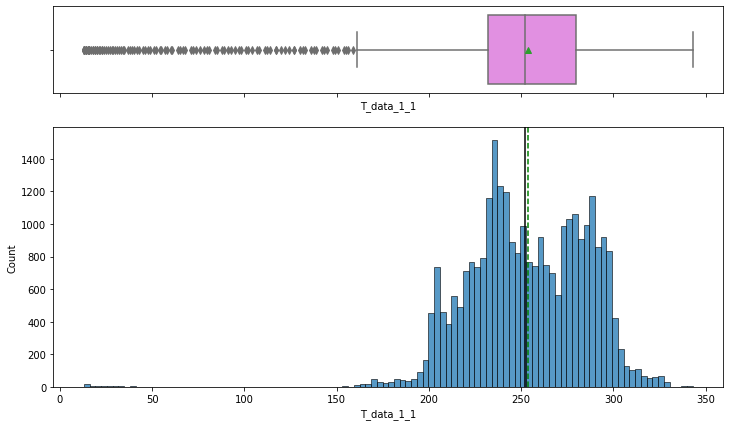

In [6]:
# Observations on T_data_1_1
histogram_boxplot(df, "T_data_1_1", figsize=(12, 7), kde=False, bins=None)

- we can see that the T_data_1_1 sensor data is slightly skewed towards left side, so we can say that this senor is having a negative skewness

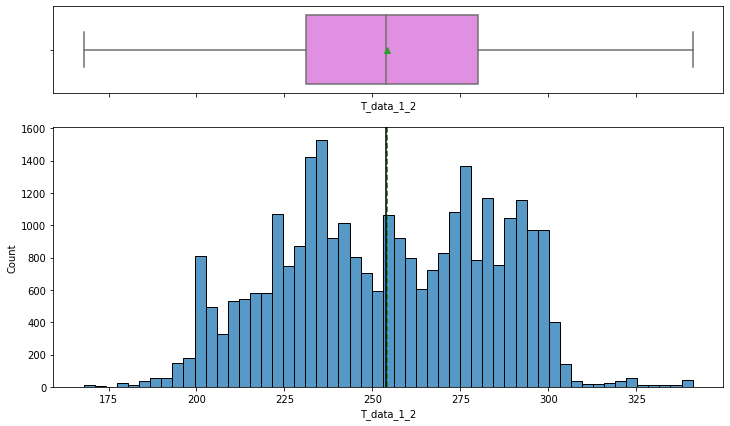

In [7]:
# Observations on T_data_1_2
histogram_boxplot(df, "T_data_1_2", figsize=(12, 7), kde=False, bins=None)

- The distribution of 1_2 sensor interesting, the skewness is very good on both side, so we will say, it is symmetrical 

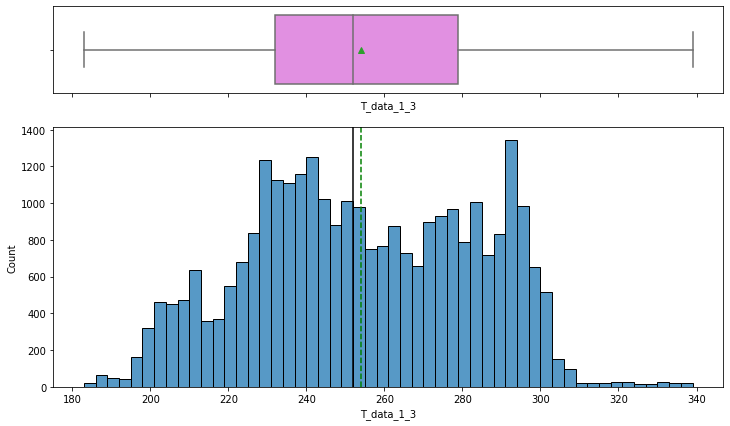

In [8]:
# Observations on T_data_1_3
histogram_boxplot(df, "T_data_1_3", figsize=(12, 7), kde=False, bins=None)

- skewness is good but very slighlty towards the right side

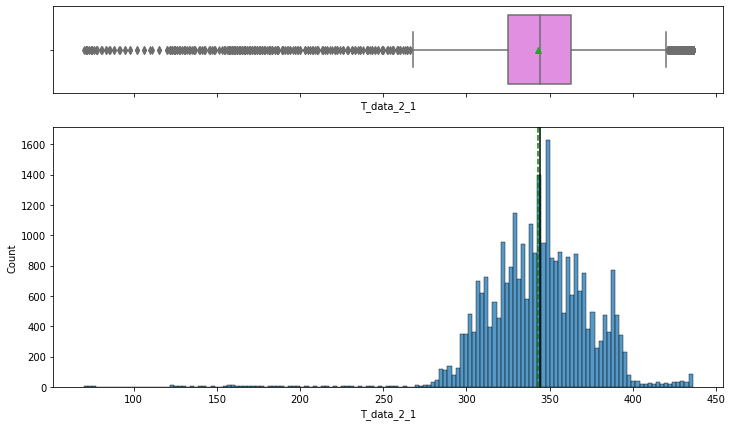

In [9]:
# Observations on T_data_2_1
histogram_boxplot(df, "T_data_2_1", figsize=(12, 7), kde=False, bins=None)

- Negatively skewed, means it is a negative skewness

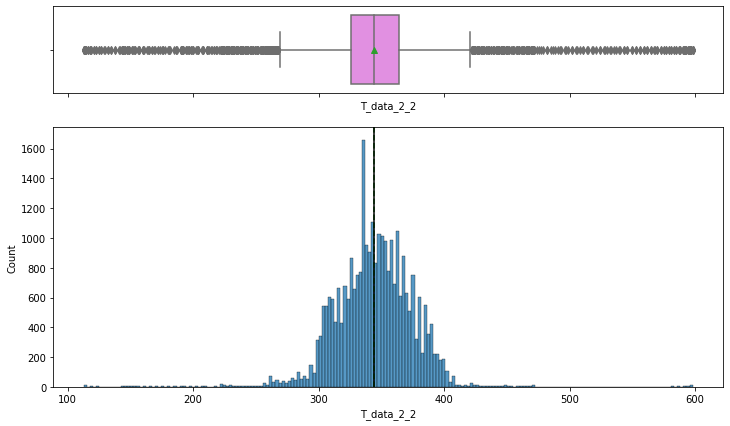

In [10]:
# Observations on T_data_2_2
histogram_boxplot(df, "T_data_2_2", figsize=(12, 7), kde=False, bins=None)

- Perfect distribution, symmetrical 

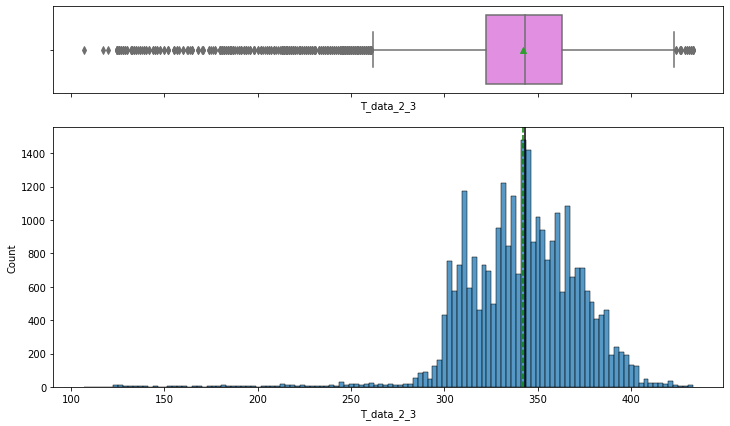

In [11]:
# Observations on T_data_2_3
histogram_boxplot(df, "T_data_2_3", figsize=(12, 7), kde=False, bins=None)

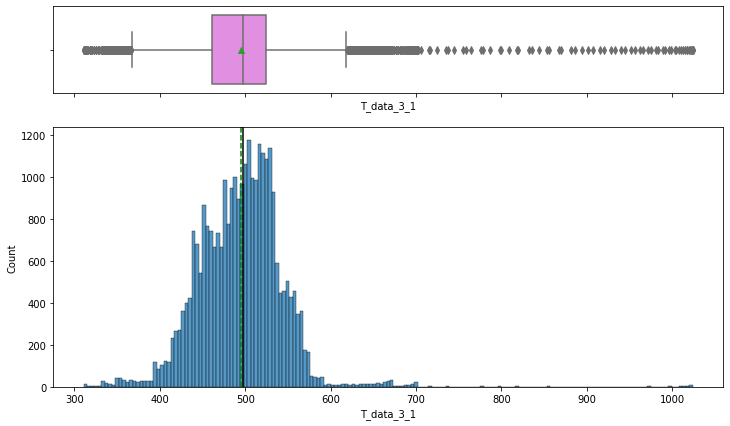

In [12]:
# Observations on T_data_3_1
histogram_boxplot(df, "T_data_3_1", figsize=(12, 7), kde=False, bins=None)

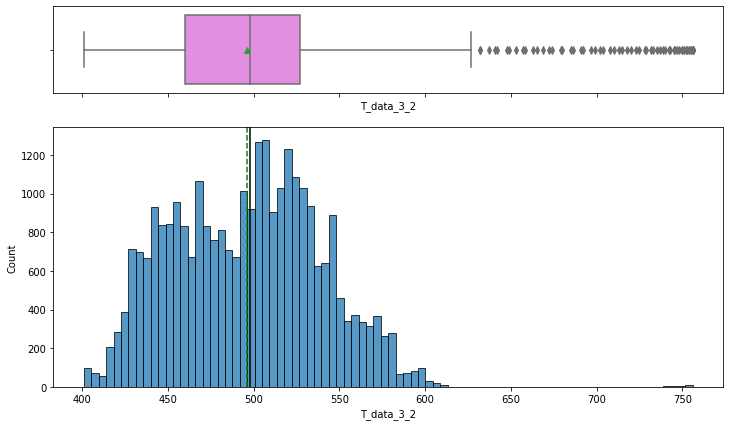

In [13]:
# Observations on T_data_3_2
histogram_boxplot(df, "T_data_3_2", figsize=(12, 7), kde=False, bins=None)

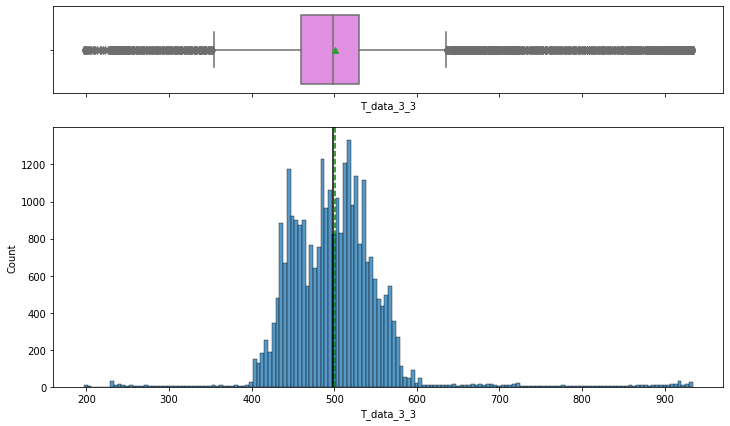

In [14]:
# Observations on T_data_3_3
histogram_boxplot(df, "T_data_3_3", figsize=(12, 7), kde=False, bins=None)

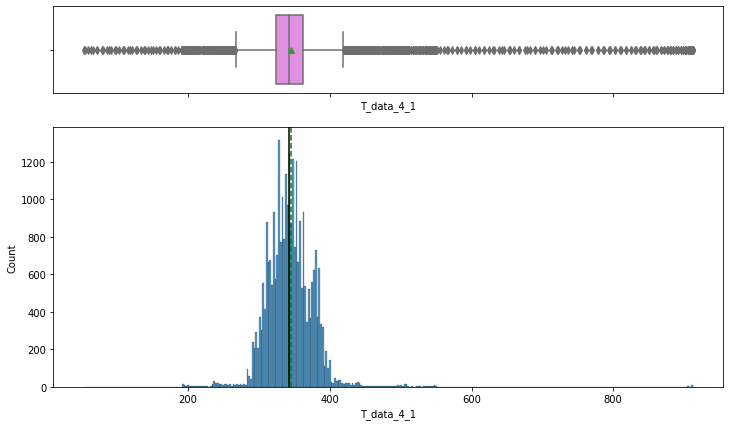

In [15]:
# Observations on T_data_4_1
histogram_boxplot(df, "T_data_4_1", figsize=(12, 7), kde=False, bins=None)

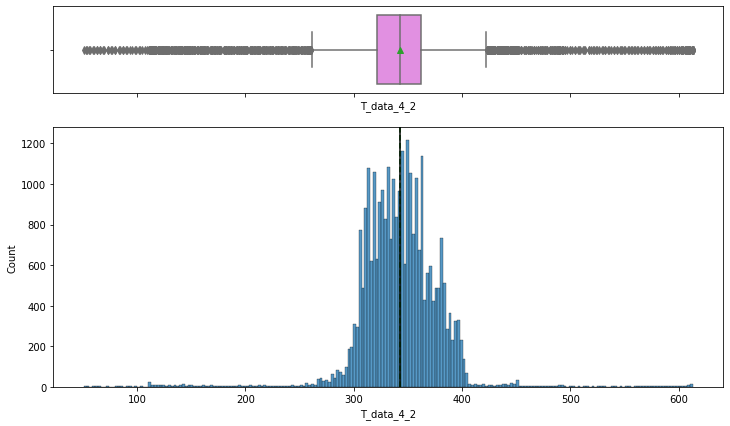

In [16]:
# Observations on T_data_4_2
histogram_boxplot(df, "T_data_4_2", figsize=(12, 7), kde=False, bins=None)

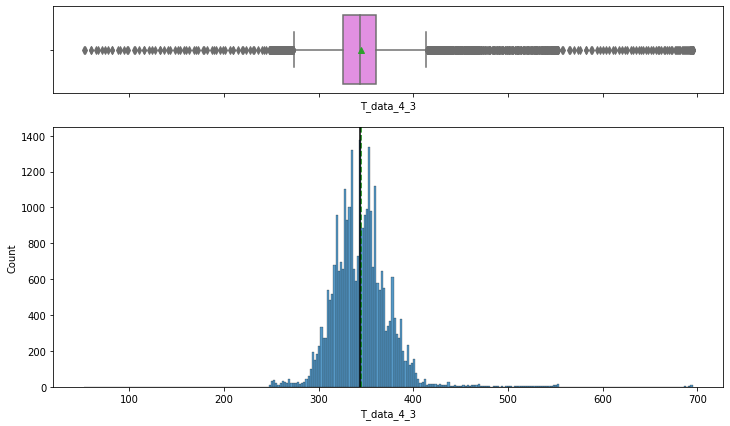

In [17]:
# Observations on T_data_4_3
histogram_boxplot(df, "T_data_4_3", figsize=(12, 7), kde=False, bins=None)

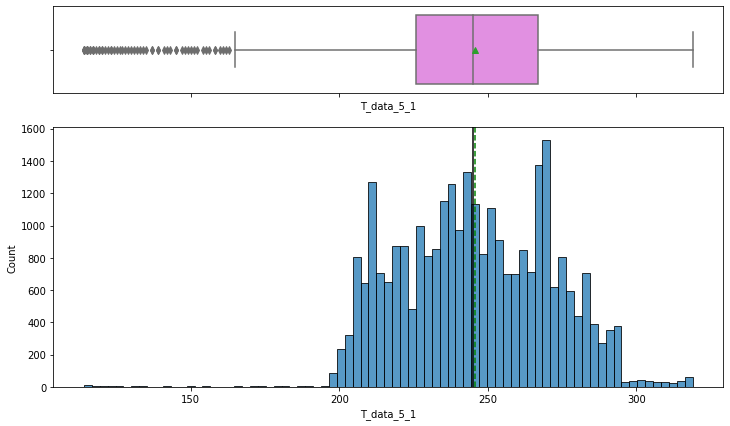

In [18]:
# Observations on T_data_5_1
histogram_boxplot(df, "T_data_5_1", figsize=(12, 7), kde=False, bins=None)

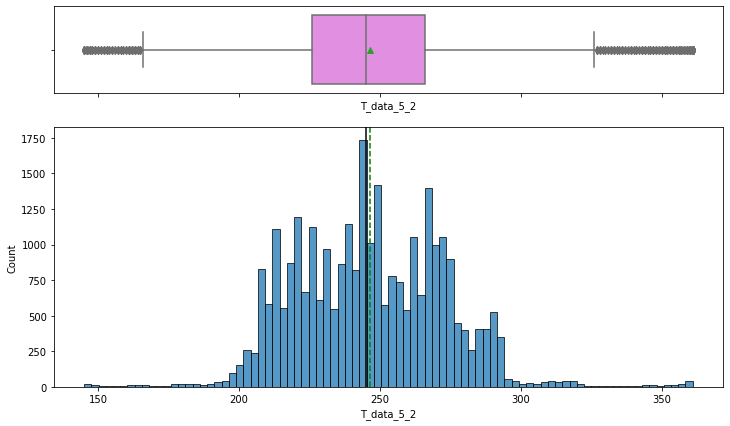

In [19]:
# Observations on T_data_5_2
histogram_boxplot(df, "T_data_5_2", figsize=(12, 7), kde=False, bins=None)

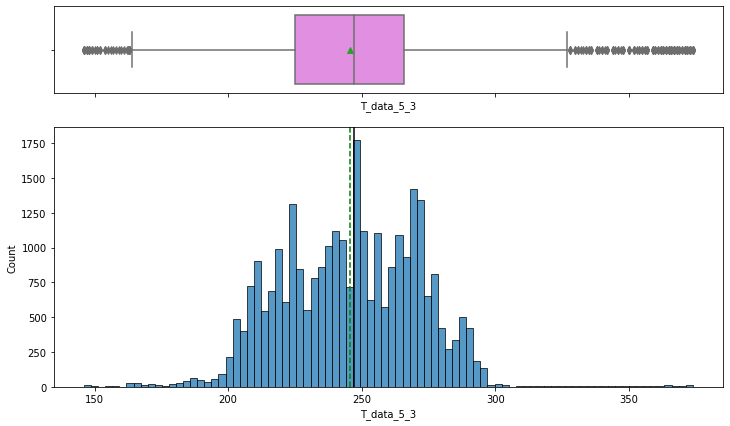

In [20]:
# Observations on T_data_5_3
histogram_boxplot(df, "T_data_5_3", figsize=(12, 7), kde=False, bins=None)

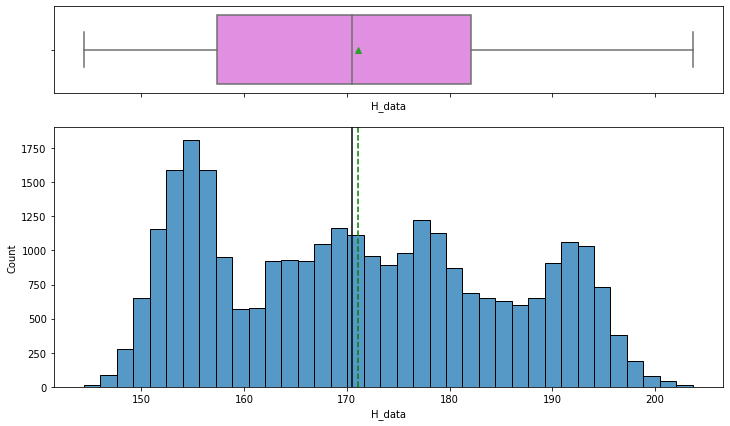

In [21]:
# Observations on H_data
histogram_boxplot(df, "H_data", figsize=(12, 7), kde=False, bins=None)

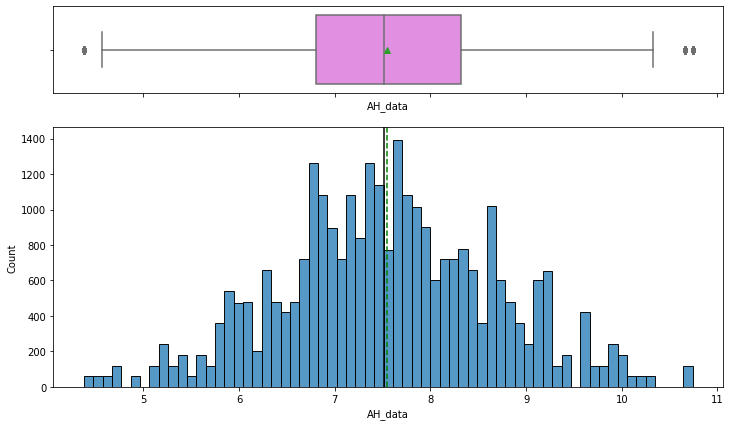

In [22]:
# Observations on AH_data
histogram_boxplot(df, "AH_data", figsize=(12, 7), kde=False, bins=None)

- We saw the statistical analysis of the dataset, some sensors are highly skewed towards left and right both sides. some skewness is very good and was symmetrical 

### Bivariate analysis

## Data Pre-Processing
some basic data pre processing will be applied to the data.
- we will check missing values
- split the data into training and testing set

In [23]:
df.describe()

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
count,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29131.000000,29087.000000,29100.000000,29131.000000
mean,253.552058,254.078061,254.057636,343.075796,344.523669,342.017335,494.513371,495.851155,500.774776,345.080979,342.737633,345.233772,245.813910,246.304143,245.757235,171.127323,7.551075,64.321753
std,32.487764,30.024924,28.977460,32.543595,33.718698,31.030835,50.315054,43.755845,64.995545,43.405324,38.339966,35.051519,25.498535,26.520344,26.050775,14.078937,1.123104,16.396936
min,13.000000,168.000000,183.000000,70.000000,113.000000,107.000000,311.000000,401.000000,197.000000,53.000000,51.000000,52.000000,114.000000,145.000000,146.000000,144.410000,4.380000,0.000000
25%,232.000000,231.000000,232.000000,325.000000,326.000000,322.500000,461.000000,460.000000,460.000000,324.000000,322.000000,326.000000,226.000000,226.000000,225.000000,157.350000,6.810000,54.000000
50%,252.000000,254.000000,252.000000,344.000000,344.000000,343.000000,497.000000,498.000000,499.000000,343.000000,343.000000,344.000000,245.000000,245.000000,247.000000,170.470000,7.520000,66.000000
75%,280.000000,280.000000,279.000000,363.000000,364.000000,363.000000,524.000000,527.000000,530.000000,362.000000,362.000000,361.000000,267.000000,266.000000,266.000000,182.135000,8.320000,77.000000
max,343.000000,341.000000,339.000000,436.000000,598.000000,433.000000,1024.000000,756.000000,934.000000,912.000000,613.000000,695.000000,319.000000,361.000000,374.000000,203.680000,10.740000,100.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29131 entries, 0 to 29130
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T_data_1_1  29131 non-null  int64  
 1   T_data_1_2  29131 non-null  int64  
 2   T_data_1_3  29131 non-null  int64  
 3   T_data_2_1  29131 non-null  int64  
 4   T_data_2_2  29131 non-null  int64  
 5   T_data_2_3  29131 non-null  int64  
 6   T_data_3_1  29131 non-null  int64  
 7   T_data_3_2  29131 non-null  int64  
 8   T_data_3_3  29131 non-null  int64  
 9   T_data_4_1  29131 non-null  int64  
 10  T_data_4_2  29131 non-null  int64  
 11  T_data_4_3  29131 non-null  int64  
 12  T_data_5_1  29131 non-null  int64  
 13  T_data_5_2  29131 non-null  int64  
 14  T_data_5_3  29131 non-null  int64  
 15  H_data      29087 non-null  float64
 16  AH_data     29100 non-null  float64
 17  quality     29131 non-null  int64  
dtypes: float64(2), int64(16)
memory usage: 4.0 MB


In [25]:
df.isnull().sum()

T_data_1_1     0
T_data_1_2     0
T_data_1_3     0
T_data_2_1     0
T_data_2_2     0
T_data_2_3     0
T_data_3_1     0
T_data_3_2     0
T_data_3_3     0
T_data_4_1     0
T_data_4_2     0
T_data_4_3     0
T_data_5_1     0
T_data_5_2     0
T_data_5_3     0
H_data        44
AH_data       31
quality        0
dtype: int64

We have some missing values in the H_data, and AH_data features

- To handle the missing values, we apply some statistical operations on the data like mean, median, and mode
- Sometimes, we remove the missing values
- In our case, we will take the mean of the data and fill the missing values

In [26]:
# Filling missing values with mean in the H_data column
df['H_data'].fillna(int(df['H_data'].mean()), inplace=True)

In [27]:
# Filling missing values with mean in the AH_data column
df['AH_data'].fillna(int(df['AH_data'].mean()), inplace=True)

In [28]:
# lets check the missing values again
df.isnull().sum()

T_data_1_1    0
T_data_1_2    0
T_data_1_3    0
T_data_2_1    0
T_data_2_2    0
T_data_2_3    0
T_data_3_1    0
T_data_3_2    0
T_data_3_3    0
T_data_4_1    0
T_data_4_2    0
T_data_4_3    0
T_data_5_1    0
T_data_5_2    0
T_data_5_3    0
H_data        0
AH_data       0
quality       0
dtype: int64

The missing values have been removed and replaced with the mean
- Lets split the data into training and testing set
- The training set will be used to train our models
- The testing data will be used to test and evaluate the trained models

In [29]:
# Lets define the independent variables 
X = df.drop('quality', axis = 1)
print(X.shape)
X.head()

(29131, 17)


,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
0,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
1,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
3,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
4,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22


In [30]:
# lets define the dependent variable 
y = df['quality']
print(y.shape)
y

(29131,)


0        61
1        57
2        61
3        63
4        63
         ..
29126    77
29127    82
29128    82
29129    82
29130    82
Name: quality, Length: 29131, dtype: int64

In [31]:
# now lets split the data into testing and training sets
# 80% data will be used for training purpose
# 20% data will be used for testing purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print('Training shape : ',X_train.shape)
print('Testing shape : ',X_test.shape)

Training shape :  (23304, 17)
Testing shape :  (5827, 17)


<AxesSubplot:>

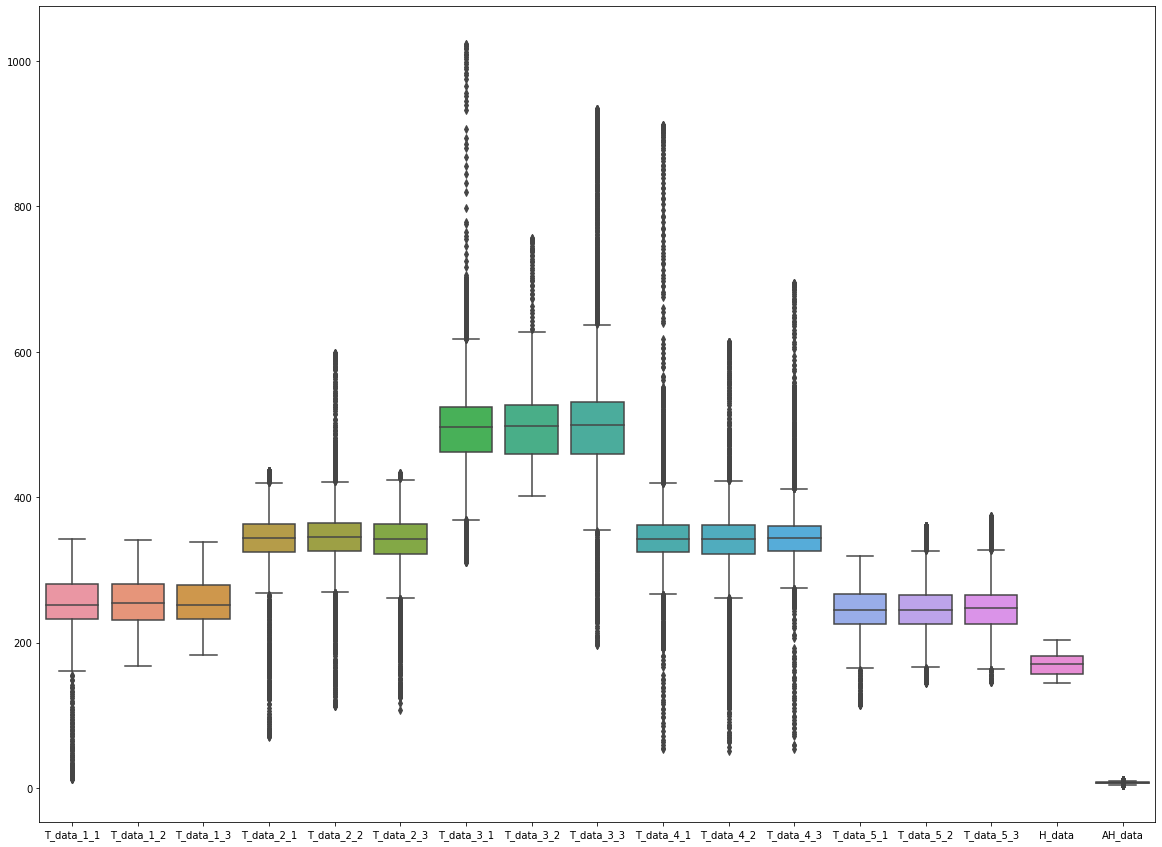

In [33]:
plt.figure(figsize = (20,15))
sns.boxplot(data=X_train)

## Model Building

**Let's create a function to calculate different metrics, so that we don't have to use the same code repeatedly for each model.**

In [34]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### The follwoing models will be trained and tested 

- Decision Tree Regressor
- Linear Regression
- Random Forest Regressor
- XGBoost Reggressor

#### Decision Tree Regressor

In [35]:
dtree = DecisionTreeRegressor(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [36]:
dtree_model_train_perf = model_performance_regression(dtree, X_train, y_train)
dtree_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,0.0,0.0,1.0,1.0


In [37]:
dtree_model_val_perf = model_performance_regression(dtree, X_test, y_test)
dtree_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,6.475893,4.503175,0.845816,0.845365


#### Linear Regression

In [38]:
linear = LinearRegression().fit(X_train, y_train)

In [39]:
linear_model_train_perf = model_performance_regression(linear, X_train, y_train)
linear_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,16.274891,13.275792,0.011859,0.011137


In [40]:
linear_model_val_perf = model_performance_regression(linear, X_test, y_test)
linear_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,16.451359,13.376731,0.004953,0.002041


- Linear regression is badly underfitting the data, hence this is a dull and black box model which is not preforming well on the data

#### Random Forest Regressor

In [41]:
random = RandomForestRegressor(random_state=1).fit(X_train, y_train)

In [42]:
random_model_train_perf = model_performance_regression(random, X_train, y_train)
random_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,1.703583,1.262128,0.989173,0.989165


In [43]:
random_model_val_perf = model_performance_regression(random, X_test, y_test)
random_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,4.569369,3.415565,0.923237,0.923012


- The Random Forest Regressor is performing very well

#### XGBoost Regressor

In [44]:
gradient = GradientBoostingClassifier(random_state=1).fit(X_train, y_train)

In [45]:
gradient_model_train_perf = model_performance_regression(gradient, X_train, y_train)
gradient_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,17.761811,12.13281,-0.176948,-0.177808


In [46]:
random_model_val_perf = model_performance_regression(gradient, X_test, y_test)
random_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,18.891546,13.583147,-0.312125,-0.315965


- Badly underfitting the data 

### Model Performance comparison

**After looking at performance of all the models, let's decide which models can further improve with hyperparameter tuning.**

**Note**: **Random Forest Regressor perfomed very well on the testing and training data, Hence the Random Forest will be tuned**

## Hyperparameter Tuning

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Bagging :

param_grid = {
    'max_samples': [0.7,0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9,1],
    'n_estimators' : [50, 100, 120, 150],
}

- For Random Forest:

param_grid = {
    'max_depth':[4, 6, 8, 10, None],
    'max_features': ['sqrt','log2',None],
    'n_estimators': [80, 90, 100, 110, 120]
}

- For Decision Trees:

param_grid = {
    'max_depth': list(np.arange(15,20)) + [None], 
    'min_samples_leaf': [1, 3] + [None],
    'max_leaf_nodes' : [5, 10, 15] + [None],
    'min_impurity_decrease': [0.001, 0.0]
}


### Sample code for tuning Random forest

In [47]:
%%time 

rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
randomized_cv = RandomizedSearchCV(rf_tuned, parameters, scoring=scorer, n_iter=40, n_jobs = -1, cv=5, random_state=1)
randomized_cv = randomized_cv.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'max_features': 'log2', 'max_depth': None} with CV score=0.911896395127697:
CPU times: total: 27.3 s
Wall time: 7min 5s


**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model performance comparison and choosing the final model

### Test set final performance

In [48]:
rftuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
rftuned_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,1.599767,1.185183,0.990452,0.990445


In [49]:
rftuned_model_val_perf = model_performance_regression(rf_tuned, X_test, y_test)
rftuned_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,4.310796,3.203131,0.931679,0.931479


### Feature Importances

In [50]:
rf_tuned.feature_importances_

array([0.05769366, 0.05566787, 0.06018303, 0.06201675, 0.05850049,
       0.06376627, 0.07102641, 0.07201847, 0.06701674, 0.06484291,
       0.06663083, 0.06134887, 0.05178102, 0.05606607, 0.05989917,
       0.0377817 , 0.03375974])

Text(0.5, 0, 'Random Forest Feature Importance')

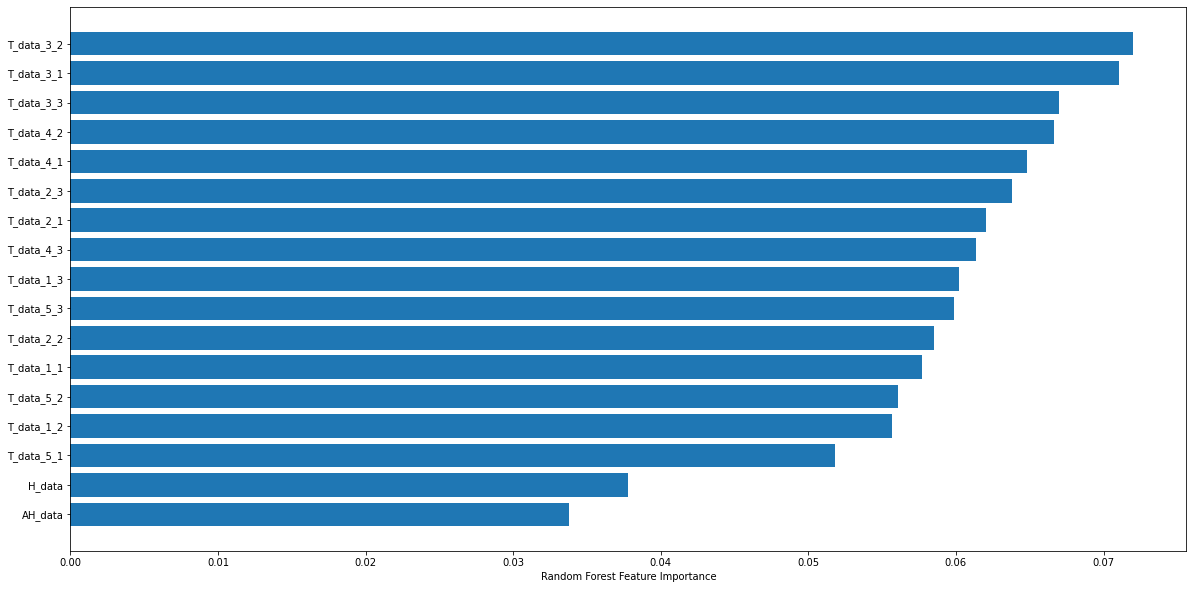

In [51]:
sorted_idx = rf_tuned.feature_importances_.argsort()
plt.figure(figsize=(20,10))
plt.barh(X_train.columns[sorted_idx], rf_tuned.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Let's use Pipelines to build the final model

In [52]:
pipeline = Pipeline([
    ('classifier', RandomForestRegressor(n_estimators = 110, max_features = 'log2', max_depth = None).fit(X_train, y_train))
])

In [53]:
pipeline_model_train_perf = model_performance_regression(pipeline, X_train, y_train)
pipeline_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,1.598553,1.182165,0.990467,0.99046


In [54]:
pipeline_model_val_perf = model_performance_regression(pipeline, X_test, y_test)
pipeline_model_val_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,4.317064,3.20139,0.93148,0.93128


In [61]:
import lime
from lime import lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['quality'], 
                                                    verbose=True, mode='regression')

In [63]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=rf_tuned.predict
)

exp.show_in_notebook(show_table=True)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 61.96462092060153
Prediction_local [62.51711991]
Right: 72.44545454545455


# Business Insights and Conclusions

A roasting corporation named "KC Roasters" wanted to predict the quality of the instrument's outputz, the quality output from different sensors like Temperature sensors and Humidity snesors will determine the quality of the roasted coffee, that is
- The best the out output, The best is the quality of the roasted coffee beans
- Based on the quality, the KC Roasters will sale the coffee beans
- Best quality roasted beans will be sold expensive

There are 17 predictors and one is the target variable, the value of target variable is between 1-100. Different regression models have been trained on the data and Random Forest Regressor is the final model with the highest accuracy.

- The final model will take data of each sensors (17 predictors)
- Based on the data given to the model, the model will predict the quality of the roasted beans
- This way, it will be easy for the KC Roasters to predeict the quality and label the price for each prediction on real time

The model will help the business to automate the process of predicting quality of the roasted beans.
- The model can be saved to a pickle file
- This pickle file can be used with any web or mobile application
- The web or mobile application can be given a streaming data online continuously 
- This way, the process of predicting the wuality of beans can be automated
- And it will be so easy for the business to sale the roasted beans based on the roasted quality 

#### Conclusion 

The goal of this project was to predict the quality of roasted coffee under a specific machine used by KC Roasters. The dataset have the data of different sensors, these sensors record temperature and humidity, based on all this records, the final quality of the roasted coffee is given.

The dataset has been imported and initial statistical analysis has been performed on the data to see the real insights and distribution of the dataset. After that the data is splitted into testing and training sets.

The following four machine learning regressor have been trained on the data and comapared to each other
- Decision Tree Regressor
- Linear Regression
- Random Forest Regressor
- XGBoost Reggressor

The comparison of models with each other has been evaluated using the
- RMSE
- MAE
- R-squared

The highest accuracy is achieved by the Random Forest Regressor with the following metrics
- RMSE = 4.3
- MAE = 3.19
- R-squared = 93%

The second highest model is Decision Tree Regressor with the following metrics
- RMSE = 8.4
- MAE = 4.5
- R-squared = 84%

Based on the highest metrics, The Random Forest is the Final model for our project.